<a href="https://colab.research.google.com/github/text123580/ml20200716/blob/master/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 73kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=da936d8072d717645e7428dc78094525277ec30d2785c6ad1308236175063a1f
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


圖長這樣: [-0.07376712  0.08343836  0.05503827 -0.07851939 -0.14549026  0.01152942
 -0.09945252 -0.10049509  0.08527521 -0.09092199  0.24134037 -0.04376339
 -0.22364116 -0.03660294  0.02819059  0.13840632 -0.11704745 -0.15371244
 -0.05732738  0.0126613   0.06873155  0.13334256 -0.00237271  0.09630058
 -0.17551546 -0.3158679  -0.06179466 -0.08448014 -0.06546696 -0.08005188
 -0.11601283  0.02467303 -0.19965224 -0.02618549  0.07379773  0.1170933
  0.00893765 -0.05067108  0.15128547  0.05420081 -0.29228806  0.11727961
  0.06320023  0.25297064  0.25642753 -0.01252779 -0.02228246 -0.16273651
  0.11261153 -0.18254851  0.09286094  0.14018643  0.10924046  0.01294652
 -0.00265817 -0.11126117 -0.01412753  0.08469719 -0.2013047  -0.00700137
  0.12169478 -0.06735744  0.03012698 -0.10836131  0.1687519   0.05339477
 -0.1214857  -0.22774632  0.03718285 -0.20320719 -0.15926285  0.12771916
 -0.17254713 -0.19122466 -0.3888129   0.05568149  0.35767925  0.13611807
 -0.25618213  0.04346836 -0.0139969  -0.034925

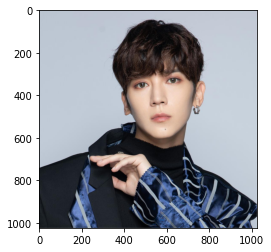

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import face_recognition
file_path="/content/drive/My Drive/AI_04/0814.jpg"
img = face_recognition.load_image_file(file_path)
en = face_recognition.face_encodings(img)[0]
print("圖長這樣:", en)
plt.imshow(img)

In [ ]:
import glob

sub = ["jfif", "jpg", "png", "jpeg"]
fn_list = []
for s in sub:
    fn_list = fn_list + glob.glob("*.{}".format(s))
encodings, names = [], []
for fn in fn_list:
    img = face_recognition.load_image_file(fn)
    en = face_recognition.face_encodings(img)[0]
    encodings.append(en)
    n = fn.split(".")[0]
    names.append(n)
print(names)
print(encodings)

[]
[]


網址:https://pgw.udn.com.tw/gw/photo.php?u=https://uc.udn.com.tw/photo/2019/04/07/1/6144959.jpg&s=Y&x=0&y=8&sw=1280&sh=852


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


跟 結衣 的距離是: 0.7095260853088089
跟 阿信 的距離是: 0.7375792430756274
跟 韓國瑜 的距離是: 0.7945621467938279
跟 英文 的距離是: 0.6794699212841547
這個最像: 英文
跟 結衣 的距離是: 0.5737029205799951
跟 阿信 的距離是: 0.4284164182561003
跟 韓國瑜 的距離是: 0.5629928328874662
跟 英文 的距離是: 0.555531635710401
這個最像: 阿信


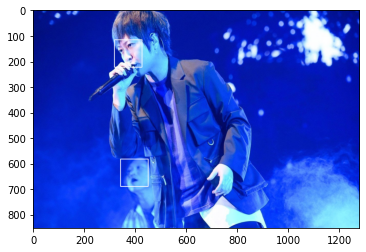

In [ ]:
import requests
import cv2
url = input("網址:")
response = requests.get(url, stream=True, verify=False)
img = face_recognition.load_image_file(response.raw)
ens = face_recognition.face_encodings(img)
locs = face_recognition.face_locations(img)
for (top, right, bottom, left), en in zip(locs, ens):
    cv2.rectangle(img, (left, top), (right, bottom), (255, 255, 255), 2)
    distances = face_recognition.face_distance(en, encodings)
    for d, n in zip(distances, names):
        print("跟", n, "的距離是:", d)
    mind = names[distances.argmin()]
    print("這個最像:", mind)
plt.imshow(img)